<a href="https://colab.research.google.com/github/PranayJagtap06/UFM_Animal_Classification/blob/master/ufm_animal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animal Classification

> This notebook is in association with the Unified Mentor Machine Learning internship project submission.

The task is to develop a system which can recognise 15 different animals. We will fine-tune the `EfficientNet_B0` model by unfreezing top 10 layers.

# 1. Download Dataset & Libraries

In [1]:
!git clone https://github.com/PranayJagtap06/UFM_Animal_Classification.git

import zipfile

# Kaggle
# zip_ref = zipfile.ZipFile("/kaggle/working/UFM_Animal_Classification/animal_classification.zip", 'r')
# zip_ref.extractall("/kaggle/working")

# Colab
zip_ref = zipfile.ZipFile("/content/UFM_Animal_Classification/animal_classification.zip", 'r')
zip_ref.extractall("/content")

zip_ref.close()

Cloning into 'UFM_Animal_Classification'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 2 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 36.57 MiB | 36.60 MiB/s, done.
Resolving deltas: 100% (1/1), done.


All the images are stored in a single folder. We will create two separate folders for training images and testing/validation images.

In [2]:
import os
import shutil
import random

# Define the dataset folder and the split ratio
# dataset_folder = '/kaggle/working/Animal Classification/dataset'  # Kaggle
dataset_folder = '/content/Animal Classification/dataset'  # Colab
train_ratio = 0.8

# Create the training and testing folders if they don't exist
train_folder = os.path.join(dataset_folder, 'train')
test_folder = os.path.join(dataset_folder, 'test')

if not os.path.exists(train_folder):
    os.makedirs(train_folder)

if not os.path.exists(test_folder):
    os.makedirs(test_folder)

# Iterate through each animal folder
for animal_folder in os.listdir(dataset_folder):
    # Skip the train and test folders
    if animal_folder in ['train', 'test']:
        continue

    # Get the path to the animal folder
    animal_folder_path = os.path.join(dataset_folder, animal_folder)

    # Create the training and testing subfolders for the animal
    animal_train_folder = os.path.join(train_folder, animal_folder)
    animal_test_folder = os.path.join(test_folder, animal_folder)

    if not os.path.exists(animal_train_folder):
        os.makedirs(animal_train_folder)

    if not os.path.exists(animal_test_folder):
        os.makedirs(animal_test_folder)

    # Get the list of image files in the animal folder
    image_files = os.listdir(animal_folder_path)

    # Split the image files into training and testing sets
    random.shuffle(image_files)
    train_size = int(len(image_files) * train_ratio)
    train_files = image_files[:train_size]
    test_files = image_files[train_size:]

    # Copy the training and testing images to their respective folders
    for file in train_files:
        shutil.copy2(os.path.join(animal_folder_path, file), animal_train_folder)

    for file in test_files:
        shutil.copy2(os.path.join(animal_folder_path, file), animal_test_folder)

    print(f"Split {animal_folder} into {len(train_files)} training images and {len(test_files)} testing images.")

Split Bear into 100 training images and 25 testing images.
Split Dog into 97 training images and 25 testing images.
Split Bird into 109 training images and 28 testing images.
Split Zebra into 109 training images and 28 testing images.
Split Cat into 98 training images and 25 testing images.
Split Elephant into 106 training images and 27 testing images.
Split Giraffe into 103 training images and 26 testing images.
Split Tiger into 103 training images and 26 testing images.
Split Deer into 101 training images and 26 testing images.
Split Lion into 104 training images and 27 testing images.
Split Dolphin into 103 training images and 26 testing images.
Split Horse into 104 training images and 26 testing images.
Split Kangaroo into 100 training images and 26 testing images.
Split Cow into 104 training images and 27 testing images.
Split Panda into 108 training images and 27 testing images.


In [ ]:
# Installing required libraries
!pip install dagshub mlflow icecream torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.6/255.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 56.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 103.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.1/118.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.6/166.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Importing libraries.
import mlflow
import dagshub
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torchvision
import torchmetrics
import torch
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from typing import Dict, Any, Optional, List, Tuple
from urllib.parse import urlparse
from icecream import ic
from rich.progress import track
from PIL import Image

import os
import pickle
import plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
# pio.templates.default = "seaborn"
pio.renderers.default = "colab"

# 2. Data Loader Script

In [ ]:
%%writefile data_loader.py
import os
import torchvision
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
from typing import Dict, List, Optional, Tuple
from dataclasses import dataclass, field
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import WeightedRandomSampler
from torch.utils.data.distributed import DistributedSampler
from sklearn.utils.class_weight import compute_class_weight

NUM_WORKERS = os.cpu_count()


def load_data_objs(
    batch_size: int,
    rank: int,
    world_size: int,
    epochs: int,
    x_train_path: str,
    x_val_path: str,
    gpu: bool,
    gpu_id: int,
    learning_rate: float,
    num_workers: int,
    lr_scheduler: Optional[str] = None,
) -> tuple[DataLoader, DataLoader, nn.Module, nn.CrossEntropyLoss, torch.optim.Optimizer, Optional[torch.optim.lr_scheduler._LRScheduler]]:
    # Loading DEFAULT = best available weights of EfficientNet_B0 model
    weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT

    # Loading transform for transforming the images to be compatible with EfficientNet_B0 model
    auto_transforms = weights.transforms()
    torch.save(auto_transforms, "effnetb0_transform.pt")

    # Loading EfficientNet_B0 model
    model = torchvision.models.efficientnet_b0(weights=weights)

    # Use ImageFolder to create dataset(s)
    train_data = datasets.ImageFolder(x_train_path, transform=auto_transforms)
    torch.save(train_data, "train_data.pt")
    val_data = datasets.ImageFolder(x_val_path, transform=auto_transforms)
    torch.save(val_data, "val_data.pt")

    # Get class names
    class_names = train_data.classes
    torch.save(class_names, "class_names.pt")

    # Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
    for param in model.features.parameters():
        param.requires_grad = False

    # Unfreeze the last 10 layers
    layers = list(model.named_parameters())
    for name, param in layers[-10:]:
        param.requires_grad = True

    # Recreate the classifier layer
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2, inplace=True),
        nn.Linear(in_features=model.classifier[1].in_features, out_features=len(class_names), bias=True))

    optimizer = torch.optim.Adam(
        params=model.parameters(), lr=learning_rate, weight_decay=1e-4)

    criterion = nn.CrossEntropyLoss()

    if gpu:
        dist_sampler_train = DistributedSampler(
            train_data, num_replicas=world_size, rank=rank, seed=42)
        train_dtl = DataLoader(train_data, batch_size=batch_size, shuffle=False,
                               pin_memory=True, sampler=dist_sampler_train, num_workers=num_workers, )

        dist_sampler_val = DistributedSampler(val_data, num_replicas=world_size, rank=rank, seed=42)
        val_dtl = DataLoader(val_data, batch_size=1, shuffle=False, pin_memory=True, sampler=dist_sampler_val, num_workers=num_workers, )

    else:
        train_dtl = DataLoader(train_data, batch_size=batch_size,
                               shuffle=True, pin_memory=True, num_workers=num_workers, )

        val_dtl = DataLoader(val_dts, batch_size=1, shuffle=False, pin_memory=True, num_workers=num_workers, )

    scheduler = None
    if lr_scheduler:
        LR_SCHEDULER = {
            # requires to set metric
            "reduce_lr": torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2),
            "one_cycle_lr": torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, epochs=epochs, steps_per_epoch=len(train_dtl), anneal_strategy='cos')
        }

        if lr_scheduler in LR_SCHEDULER:
            scheduler = LR_SCHEDULER[lr_scheduler]
        else:
            raise ValueError(f"""Invalid lr_scheduler value: {
                lr_scheduler}. Valid options are: {list(LR_SCHEDULER.keys())}""")
    return train_dtl, val_dtl, model, criterion, optimizer, scheduler


Writing data_loader.py


# 3. PyTorch Engine Script

In [ ]:
%%writefile pt_engine.py
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.utils.data import DataLoader
from typing import List, Dict, Optional
from rich.progress import track
from pathlib import Path
from icecream import ic
import torch.distributed as dist
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import random
import torchmetrics
import torch
import time
import os


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)


def loss_metric_tensor(array: List[Dict[str, np.ndarray]]) -> torch.Tensor:
    all_tensors = [torch.tensor([[array[0][j][k] for k in range(
        len(array[0][j]))]], dtype=torch.float32) for j in array[0].keys()]
    b = torch.cat(all_tensors, dim=0)
    return b.transpose(0, 1)


class CustomTrainer:
    def __init__(
        self,
        model: nn.Module,
        train_data: DataLoader,
        val_data: DataLoader,
        criterion: nn.CrossEntropyLoss,
        optimizer: torch.optim.Optimizer,
        gpu_id: int,
        save_path: str | Path,
        gpu: bool,
        patience: int = 5,
        max_epochs: int = 10,
        world_size: int = 1,
        scheduler: Optional[torch.optim.lr_scheduler._LRScheduler] = None
        ) -> None:
        self.model = model
        self.train_data = train_data
        self.val_data = val_data
        self.criterion = criterion
        self.optimizer = optimizer
        self.gpu_id = gpu_id
        self.save_path = save_path
        self.gpu = gpu
        self.patience = patience
        self.max_epochs = max_epochs
        self.world_size = world_size
        self.scheduler = scheduler

        if self.gpu:
            self.model = DDP(self.model.to(self.gpu_id), device_ids=[self.gpu_id])
            self.train_losses_ = [{f'train_losses{i}': np.array([]) for i in range(self.world_size)}]
            self.val_losses_ = [{f'val_losses{i}': np.array([]) for i in range(self.world_size)}]
            self.train_f1s_ = [{f'train_metrics{i}': np.array([]) for i in range(self.world_size)}]
            self.val_f1s_ = [{f'val_metrics{i}': np.array([]) for i in range(self.world_size)}]
            self.train_accuracies_ = [{f'train_metrics{i}': np.array([]) for i in range(self.world_size)}]
            self.val_accuracies_ = [{f'val_metrics{i}': np.array([]) for i in range(self.world_size)}]
            self.train_metric_accuracy = torchmetrics.classification.MulticlassAccuracy(num_classes=15, average="micro", sync_on_compute=False).to(self.gpu_id)
            self.train_metric_f1score = torchmetrics.classification.MulticlassF1Score(num_classes=15, average="macro", sync_on_compute=False).to(self.gpu_id)
            self.val_metric_accuracy = torchmetrics.classification.MulticlassAccuracy(num_classes=15, average="micro", sync_on_compute=False).to(self.gpu_id)
            self.val_metric_f1score = torchmetrics.classification.MulticlassF1Score(num_classes=15, average="macro", sync_on_compute=False).to(self.gpu_id)
            # self.val_metric_accuracy = torchmetrics.classification.BinaryAccuracy(sync_on_compute=False).to(self.gpu_id)
            # self.val_metric_f1score = torchmetrics.classification.BinaryF1Score(sync_on_compute=False).to(self.gpu_id)
        else:
            self.train_losses_ = [{"losses": np.array([])}]
            self.val_losses_ = [{"losses": np.array([])}]
            self.train_f1s_ = [{"metrics": np.array([])}]
            self.val_f1s_ = [{"metrics": np.array([])}]
            self.train_accuracies_ = [{"metrics": np.array([])}]
            self.val_accuracies_ = [{"metrics": np.array([])}]
            self.train_metric_accuracy = torchmetrics.classification.MulticlassAccuracy(num_classes=15, average="micro")
            self.train_metric_f1score = torchmetrics.classification.MulticlassF1Score(num_classes=15, average="macro")
            self.val_metric_accuracy = torchmetrics.classification.MulticlassAccuracy(num_classes=15, average="micro")
            self.val_metric_f1score = torchmetrics.classification.MulticlassF1Score(num_classes=15, average="macro")
            # self.val_metric_accuracy = torchmetrics.classification.BinaryAccuracy()
            # self.val_metric_f1score = torchmetrics.classification.BinaryF1Score()


    def _run_batch(self, source: torch.Tensor, targets: torch.Tensor, pred_labels: np.ndarray) -> tuple[float]:
        source = source.to(self.gpu_id)
        targets = targets.to(self.gpu_id)

        self.model.train()
        self.optimizer.zero_grad()
        y_logits = self.model(source)
        preds = torch.softmax(y_logits, dim=1)
        preds = torch.argmax(preds, dim=1)
        loss = self.criterion(y_logits, targets)
        loss.backward()
        self.optimizer.step()

        pred_labels[0]['preds'].extend(preds.detach().cpu().numpy().tolist())
        pred_labels[0]['targets'].extend(targets.cpu().numpy().tolist())

        self.train_metric_accuracy.update(preds, targets)
        self.train_metric_f1score.update(preds, targets)

        return loss.item(), pred_labels


    def _run_eval(self, epoch: int) -> tuple[float, float, float]:
        self.model.eval()
        total_samples = len(self.val_data.dataset)
        total_loss = 0
        total_accuracy = 0
        total_f1score = 0
        total_samples_ = 0

        if self.gpu:
            self.val_data.sampler.set_epoch(epoch)
            self.val_metric_accuracy.reset()
            self.val_metric_f1score.reset()

        pred_labels = np.array([{'targets': [], 'preds': []}])
        with torch.inference_mode():
            for source, targets in track(self.val_data, description=f"Evaluating...", style='red', complete_style='cyan', finished_style='green'):
                source = source.to(self.gpu_id)
                targets = targets.to(self.gpu_id)

                y_logits = self.model(source)
                preds = torch.softmax(y_logits, dim=1)
                preds = torch.argmax(preds, dim=1)
                loss = self.criterion(y_logits, targets)

                batch_size_ = source.size(0)  # Get batch size
                total_samples_ += batch_size_  # Accumulate total samples

                self.val_metric_accuracy.update(preds, targets)
                self.val_metric_f1score.update(preds, targets)
                total_loss += loss.item() * batch_size_

                pred_labels[0]['preds'].extend(preds.detach().cpu().numpy().tolist())
                pred_labels[0]['targets'].extend(targets.cpu().numpy().tolist())

        self.model.train()
        avg_loss = total_loss / total_samples_

        accuracy = self.val_metric_accuracy.compute()
        f1score = self.val_metric_f1score.compute()

        return avg_loss, accuracy.item(), f1score.item(), pred_labels


    def _run_epoch(self, epoch: int, total_epochs: int) -> tuple[float, float, float]:
        total_samples = len(self.train_data.dataset)
        num_batches = len(self.train_data)
        total_loss = 0
        total_accuracy = 0
        total_f1score = 0
        total_samples_ = 0

        if self.gpu:
            self.train_data.sampler.set_epoch(epoch)
            self.train_metric_accuracy.reset()
            self.train_metric_f1score.reset()

        pred_labels = np.array([{'targets': [], 'preds': []}])
        for source, targets in track(self.train_data,
                         description=f"""{f"[GPU{self.gpu_id}] " if self.gpu else ""}Epoch {epoch + 1}/{total_epochs} | Training: {num_batches} batches...""", style='red', complete_style='cyan', finished_style='green'):

            batch_size_ = source.size(0)  # Get batch size
            total_samples_ += batch_size_  # Accumulate total samples

            loss, pred_labels = self._run_batch(source, targets, pred_labels)
            total_loss += loss * batch_size_

        avg_loss = total_loss / total_samples_

        accuracy = self.train_metric_accuracy.compute()
        f1score = self.train_metric_f1score.compute()

        return avg_loss, accuracy.item(), f1score.item(), pred_labels


    def _save_checkpoint(self, train_loss: float, val_loss: float, train_accuracy: float, val_accuracy: float, train_f1score: float, val_f1score: float, train_labels: np.ndarray, val_labels: np.ndarray) -> None:
        ckp = self.model.module.state_dict()
        ckp_path = f"{self.save_path}/best_model.pt"
        torch.save(ckp, ckp_path)
        np.save("loss_train.npy", train_loss, allow_pickle=True)
        np.save("accuracy_train.npy", train_accuracy, allow_pickle=True)
        np.save("f1score_train.npy", train_f1score, allow_pickle=True)
        np.save("train_labels.npy", train_labels, allow_pickle=True)
        np.save("loss_val.npy", val_loss, allow_pickle=True)
        np.save("accuracy_val.npy", val_accuracy, allow_pickle=True)
        np.save("f1score_val.npy", val_f1score, allow_pickle=True)
        np.save("val_labels.npy", val_labels, allow_pickle=True)

        if self.gpu:
            print(f"\t\tNew best model saved at {ckp_path} from GPU{self.gpu_id}.")
        else:
            print(f"\t\tNew best model save at {ckp_path}.")


    def gather_tensor(self, t: torch.Tensor) -> torch.Tensor:
        gathered_t = [torch.zeros_like(t) for _ in range(self.world_size)]
        torch.distributed.all_gather(gathered_t, t)
        return torch.cat(gathered_t, dim=0)


    def train(self) -> None:
        if self.gpu:
            should_stop = torch.zeros(1).to(self.gpu_id)
            patience_count = torch.zeros(1, dtype=torch.int32).to(self.gpu_id)

            # Gather losses from all GPUs
            train_losses = [torch.zeros(1).to(self.gpu_id)
                            for _ in range(self.world_size)]
            val_losses = [torch.zeros(1).to(self.gpu_id)
                          for _ in range(self.world_size)]
            train_f1s = [torch.zeros(1).to(self.gpu_id)
                         for _ in range(self.world_size)]
            val_f1s = [torch.zeros(1).to(self.gpu_id)
                       for _ in range(self.world_size)]
            train_accuracies = [torch.zeros(1).to(self.gpu_id)
                                for _ in range(self.world_size)]
            val_accuracies = [torch.zeros(1).to(self.gpu_id)
                              for _ in range(self.world_size)]
            val_losses_t = torch.empty(0).to(self.gpu_id)
            val_metrics_t = torch.empty(0).to(self.gpu_id)
        else:
            should_stop = torch.zeros(1)
            patience_count = torch.zeros(1, dtype=torch.int32)
            train_losses = []
            val_losses = []
            train_f1s = []
            val_f1s = []
            train_accuracies = []
            val_accuracies = []
            val_losses_t = []
            val_metrics_t = []

        set_seed(42)
        for epoch in range(self.max_epochs):
            train_loss, train_accuracy, train_f1, train_labels = self._run_epoch(epoch, self.max_epochs)
            val_loss, val_accuracy, val_f1, val_labels = self._run_eval(epoch)

            print(f"""\t{f"[GPU{self.gpu_id}] | " if self.gpu else ""}Batches: {len(self.train_data)} per GPU | Val Steps: {len(self.val_data)} | train_loss: {train_loss:.4f} | val_loss: {val_loss:.4f} | train_accuracy: {train_accuracy:.4f} | val_accuracy: {val_accuracy:.4f} | train_f1: {train_f1:.4f} | val_f1: {val_f1:.4f} | Learning Rate: {self.optimizer.param_groups[0]['lr']:.6f}""")

            if self.scheduler is not None:
                self.scheduler.step(val_loss)

            # ic(pred_labels[0]['targets'][-6:], pred_labels[0]['preds'][-6:])

            # Save losses for all GPUs
            if self.gpu:
                try:
                    torch.distributed.all_gather(
                        train_losses, torch.tensor([train_loss]).to(self.gpu_id))
                    torch.distributed.all_gather(
                        val_losses, torch.tensor([val_loss]).to(self.gpu_id))
                    torch.distributed.all_gather(
                        train_f1s, torch.tensor([train_f1]).to(self.gpu_id))
                    torch.distributed.all_gather(
                        val_f1s, torch.tensor([val_f1]).to(self.gpu_id))
                    torch.distributed.all_gather(
                        train_accuracies, torch.tensor([train_accuracy]).to(self.gpu_id))
                    torch.distributed.all_gather(
                        val_accuracies, torch.tensor([val_accuracy]).to(self.gpu_id))
                except RuntimeError as e:
                    print(f"Error gathering losses: {e}")
                    break

                for i in range(self.world_size):
                    self.train_losses_[0][f"train_losses{i}"] = np.append(
                        self.train_losses_[0][f"train_losses{i}"], train_losses[i].item())
                    self.val_losses_[0][f"val_losses{i}"] = np.append(
                        self.val_losses_[0][f"val_losses{i}"], val_losses[i].item())
                    self.train_f1s_[0][f"train_metrics{i}"] = np.append(
                        self.train_f1s_[0][f"train_metrics{i}"], train_f1s[i].item())
                    self.val_f1s_[0][f"val_metrics{i}"] = np.append(
                        self.val_f1s_[0][f"val_metrics{i}"], val_f1s[i].item())
                    self.train_accuracies_[0][f"train_metrics{i}"] = np.append(
                        self.train_accuracies_[0][f"train_metrics{i}"], train_accuracies[i].item())
                    self.val_accuracies_[0][f"val_metrics{i}"] = np.append(
                        self.val_accuracies_[0][f"val_metrics{i}"], val_accuracies[i].item())

                val_losses_t = loss_metric_tensor(self.val_losses_)
                val_metrics_t = loss_metric_tensor(self.val_f1s_)

                val_losses_last_item = np.min(val_losses_t[-1:].squeeze().numpy())
                val_metrics_last_item = np.max(val_metrics_t[-1:].squeeze().numpy())
                bval_loss = np.min(val_losses_t.numpy())
                bval_metric = np.max(val_metrics_t.numpy())

                improved = torch.tensor([False], dtype=torch.bool).to(self.gpu_id)
            else:
                self.val_losses_[0]["losses"] = np.append(self.val_losses_[0]["losses"], val_losses)
                self.val_f1s_[0]["metrics"] = np.append(self.val_f1_s[0]["metrics"], val_f1s)
                self.val_accuracies_[0]["metrics"] = np.append(self.val_accuracies_[0]["metrics"], val_accuracies)

                val_losses_last_item = self.val_losses_[0]["losses"][-1]
                val_metrics_last_item = self.val_f1s_[0]["metrics"][-1]
                bval_loss = np.min(self.val_losses_)
                bval_metric = np.max(self.val_f1s_)
                improved = torch.tensor([False], dtype=torch.bool)

            if self.gpu:
                if (len(torch.where(val_losses_t == val_losses_last_item)[1]) == 1) and (
                        len(torch.where(val_metrics_t == val_metrics_last_item)[1]) == 1):
                    val_losses_last_gpu = torch.where(
                        val_losses_t == val_losses_last_item)[1].item()
                    val_metrics_last_gpu = torch.where(
                        val_metrics_t == val_metrics_last_item)[1].item()
                    val_losses_last_gpu_row = torch.where(
                        val_losses_t == val_losses_last_item)[0].item()
                    val_metrics_last_gpu_row = torch.where(
                        val_metrics_t == val_metrics_last_item)[0].item()

                    val_losses_last_metric = val_metrics_t[val_losses_last_gpu_row, val_losses_last_gpu]
                    val_metrics_last_loss = val_losses_t[val_metrics_last_gpu_row, val_metrics_last_gpu]

                    if (val_losses_last_item == bval_loss) and (val_metrics_last_item == bval_metric) and (
                            val_losses_last_gpu == val_metrics_last_gpu) and (self.gpu_id == val_losses_last_gpu):
                        print(f"""\t\t1/1:[GPU{self.gpu_id}] val_loss improved to {
                        val_losses_last_item:.4f} | val_f1score improved to {val_metrics_last_item:.4f}""")
                        self._save_checkpoint(train_loss, train_accuracy, train_f1, val_loss, val_accuracy, val_f1, train_labels, val_labels)

                        improved = torch.tensor([True], dtype=torch.bool).to(self.gpu_id)

                        time.sleep(2)
                    elif (val_losses_last_item == bval_loss) and (val_metrics_last_item == bval_metric) and (
                            val_losses_last_gpu != val_metrics_last_gpu) and (self.gpu_id == val_losses_last_gpu):
                        print(f"""\t\t1/2:[GPU{self.gpu_id}] val_loss improved to {
                        val_losses_last_item:.4f} | val_f1score: {val_losses_last_metric:.4f}""")
                        self._save_checkpoint(train_loss, train_accuracy, train_f1, val_loss, val_accuracy, val_f1, train_labels, val_labels)

                        improved = torch.tensor([True], dtype=torch.bool).to(self.gpu_id)

                        time.sleep(2)
                    elif (val_losses_last_item == bval_loss) and (self.gpu_id == val_losses_last_gpu):
                        print(f"""\t\t1/3:[GPU{self.gpu_id}] val_loss improved to {
                        val_losses_last_item:.4f} | val_f1score: {val_losses_last_metric:.4f}""")
                        self._save_checkpoint(train_loss, train_accuracy, train_f1, val_loss, val_accuracy, val_f1, train_labels, val_labels)

                        improved = torch.tensor([True], dtype=torch.bool).to(self.gpu_id)

                        time.sleep(2)
                    elif (val_metrics_last_item == bval_metric) and (self.gpu_id == val_metrics_last_gpu):
                        print(f"""\t\t1/4[GPU{self.gpu_id}] val_loss: {
                        val_metrics_last_loss:.4f} | val_f1score improved to {val_metrics_last_item:.4f}""")
                        self._save_checkpoint(train_loss, train_accuracy, train_f1, val_loss, val_accuracy, val_f1, train_labels, val_labels)

                        improved = torch.tensor([True], dtype=torch.bool).to(self.gpu_id)

                        time.sleep(2)
                elif (len(torch.where(val_losses_t == val_losses_last_item)[1]) == 1) and (
                        len(torch.where(val_metrics_t == val_metrics_last_item)[1]) > 1):
                    val_losses_last_gpu = torch.where(
                        val_losses_t == val_losses_last_item)[1].item()
                    val_losses_last_gpu_row = torch.where(
                        val_losses_t == val_losses_last_item)[0].item()
                    val_losses_last_metric = val_metrics_t[val_losses_last_gpu_row, val_losses_last_gpu]

                    if (val_losses_last_item == bval_loss) and (self.gpu_id == val_losses_last_gpu):
                        print(f"""\t\t3:[GPU{self.gpu_id}] val_loss improved to {
                        val_losses_last_item:.4f} | val_f1score: {val_losses_last_metric:.4f}""")
                        self._save_checkpoint(train_loss, train_accuracy, train_f1, val_loss, val_accuracy, val_f1, train_labels, val_labels)

                        improved = torch.tensor([True], dtype=torch.bool).to(self.gpu_id)

                        time.sleep(2)
                else:
                    pass
            else:
                if (val_losses_last_item == bval_loss) and (val_metrics_last_item == bval_metric):
                    print(f"""\t\t1:val_loss improved to {
                    val_losses_last_item:.4f} | val_f1score improved to {val_metrics_last_item:.4f}""")
                    self._save_checkpoint(train_loss, train_accuracy, train_f1, val_loss, val_accuracy, val_f1, train_labels, val_labels)

                    improved = torch.tensor([True], dtype=torch.bool)

                    time.sleep(2)
                elif val_losses_last_item == bval_loss:
                    print(f"""\t\t2:val_loss improved to {
                    val_losses_last_item:.4f} | val_f1score: {val_metrics_last_item:.4f}""")
                    self._save_checkpoint(train_loss, train_accuracy, train_f1, val_loss, val_accuracy, val_f1, train_labels, val_labels)

                    improved = torch.tensor([True], dtype=torch.bool)

                    time.sleep(2)
                elif val_metrics_last_item == bval_metric:
                    print(f"""\t\t3:val_loss: {
                    val_losses_last_item:.4f} | val_f1score improved to {val_metrics_last_item:.4f}""")
                    self._save_checkpoint(train_loss, train_accuracy, train_f1, val_loss, val_accuracy, val_f1, train_labels, val_labels)

                    improved = torch.tensor([True], dtype=torch.bool)

                    time.sleep(2)
                else:
                    pass

            if self.gpu:
                # Synchronize patience count across all GPU
                improved_state = self.gather_tensor(improved)

                # Update patience count
                if self.world_size == 1:
                    if improved_state:
                        patience_count.zero_()
                    else:
                        patience_count += 1
                else:
                    if (improved_state[0] and improved_state[1]) or (improved_state[0] or improved_state[1]):
                        patience_count.zero_()
                    else:
                        patience_count += 1

                # Synchronize patience count across all GPUs
                all_patience_counts = self.gather_tensor(patience_count)
                max_patience_count = torch.max(all_patience_counts).item()
                patience_count.fill_(max_patience_count)

                if max_patience_count >= self.patience:
                    print(
                        f"\n[GPU{self.gpu_id}] Patience exceeded. Early stopping...")
                    should_stop[0] = 1

                # Synchronize the should_stop tensor across all GPUs
                should_stop_list = [torch.zeros(1).to(
                    self.gpu_id) for _ in range(self.world_size)]
                torch.distributed.all_gather(should_stop_list, should_stop)

                # If any GPU wants to stop, all GPUs should stop
                if any(_stop.item() for _stop in should_stop_list):
                    break
            else:
                if improved:
                    patience_count.zero_()
                else:
                    patience_count += 1

                    if patience_count >= self.patience:
                        print(f"\nPatience exceeded. Early stopping...")
                        break

            time.sleep(2)

        if self.gpu:
            # Ensure all GPUs exit the training loop together
            dist.barrier()

            if self.gpu_id == 0:
                np.save("train_losses.npy", self.train_losses_, allow_pickle=True)
                np.save("train_f1s.npy", self.train_f1s_, allow_pickle=True)
                np.save("train_accuracies.npy", self.train_accuracies_, allow_pickle=True)
                np.save("val_losses.npy", self.val_losses_, allow_pickle=True)
                np.save("val_f1s.npy", self.val_f1s_, allow_pickle=True)
                np.save("val_accuracies.npy", self.val_accuracies_, allow_pickle=True)
        else:
            np.save("train_losses.npy", self.train_losses_, allow_pickle=True)
            np.save("train_f1s.npy", self.train_f1s_, allow_pickle=True)
            np.save("train_accuracies.npy", self.train_accuracies_, allow_pickle=True)
            np.save("val_losses.npy", self.val_losses_, allow_pickle=True)
            np.save("val_f1s.npy", self.val_f1s_, allow_pickle=True)
            np.save("val_accuracies.npy", self.val_accuracies_, allow_pickle=True)

Writing pt_engine.py


# 4. Training Script

In [ ]:
%%writefile pt_train.py
from torch.distributed import init_process_group, destroy_process_group
from pt_engine import CustomTrainer
from data_loader import load_data_objs
from typing import Optional
from pathlib import Path
import torch.multiprocessing as mp
import torch.distributed as dist
import numpy as np
import argparse
import random
import torch
import time
import os


NUM_WORKERS = os.cpu_count()


def find_free_port():
    """Finds a free port."""
    import socket
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind(('', 0))  # Bind to port 0 to get a free port
        print("Got free port...")
        return s.getsockname()[1]


def ddp_setup(rank: int, world_size: int) -> None:
    """
    Args:
        rank: Unique identifier of each process
        world_size: Total number of processes
    """
    os.environ['MASTER_ADDR'] = 'localhost'
    os.environ['MASTER_PORT'] = '12355'
    print("Init. process group...")
    dist.init_process_group("nccl", rank=rank, world_size=world_size)
    torch.cuda.set_device(rank)


def cleanup():
    dist.destroy_process_group()


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)


def main(rank: Optional[int], world_size: Optional[int], total_epochs: int, patience: int, batch_size: int, save_path: str | Path, xtrain_path: str, xval_path: str, learning_rate: float, lr_scheduler: str, gpu: bool) -> None:
    if gpu:
        # if rank == 0:
        print(f"{'>' * 10}AnimalClassifier Model Training{'<' * 10}\n")
        ddp_setup(rank, world_size)
        print("Initializing dataset and model...")
        train_dtl, val_dtl, model, criterion, optimizer, scheduler = load_data_objs(
            batch_size, rank, world_size, total_epochs, xtrain_path, xval_path, gpu, rank,
            learning_rate, NUM_WORKERS, lr_scheduler)
        print("Created dataset and initialized model...")
        trainer = CustomTrainer(model=model, train_data=train_dtl, val_data=val_dtl, criterion=criterion, optimizer=optimizer, gpu_id=rank, save_path=save_path, gpu=gpu, patience=patience, max_epochs=total_epochs, world_size=world_size, scheduler=scheduler)
        print("Starting model training...")
        trainer.train()
        # destroy_process_group()
        cleanup()
        print(f"\n<{'=' * 10}Training completed & best model saved{'=' * 10}>\nExiting...")
    else:
        print(f"{'>' * 10}AnimalClassifier Model Training{'<' * 10}\n")
        train_dtl, val_dtl, model, criterion, optimizer, scheduler = load_data_objs(
            batch_size, rank, world_size, total_epochs, xtrain_path, xval_path, gpu, rank,
            learning_rate, NUM_WORKERS, lr_scheduler)
        trainer = CustomTrainer(model=model, train_data=train_dtl, val_data=val_dtl, criterion=criterion, optimizer=optimizer, gpu_id=rank, save_path=save_path, gpu=gpu, patience=patience, max_epochs=total_epochs, world_size=world_size, scheduler=scheduler)
        trainer.train()
        print(f"\n<{'=' * 10}Training completed & best model saved{'=' * 10}>\nExiting...")


def create_model_path(path_str: str) -> Path | None:
    try:
        model_path = Path(path_str)
        model_path.mkdir(parents=True, exist_ok=True)

        # Check if the directory is writable
        if not os.access(model_path, os.W_OK):
            raise PermissionError(f"The directory {model_path} is not writable.")

        return model_path

    except PermissionError as e:
        print(f"Permission error: {e}")
        return None

    except OSError as e:
        print(f"OS error occurred when creating directory: {e}")
        return None

    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


def exec_time(st: float, et: float) -> None:
    hour = int(et-st)//3600
    minute = int((et-st)%3600)//60
    second = int(et-st)%60
    print(f'\nexec time => {hour:02d}hr : {minute:02d}min : {second:02d}sec')


if __name__ == "__main__":
    os.environ['NOTEBOOKAPP_IOPUB_MSG_RATE_LIMIT'] = '10000.0'
    os.environ['NOTEBOOKAPP_RATE_LIMIT_WINDOW'] = '10.0'
    os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
    parser = argparse.ArgumentParser(description='simple distributed training job')
    parser.add_argument('--total_epochs', default=10, type=int,
                        help='Total epochs to train the model (default: 10)')
    parser.add_argument('--patience', default=5, type=int,
                        help='Patience for increasing val_loss (default: 5)')
    parser.add_argument('--batch_size', default=32, type=int,
                        help='Input batch size on each device (default: 32)')
    parser.add_argument('--model_save_path', default='./checkpoints', type=str,
                        help='Path to save the best model (default: ./checkpoints)')
    parser.add_argument('--xtrain_path', default='X_train.npy', type=str,
                        help='Path to X_train pytorch tensor (default: X_train.npy)')
    parser.add_argument('--xval_path', default='X_val.npy', type=str,
                        help='Path to X_val pytorch tensor (default: X_val.npy)')
    parser.add_argument('--learning_rate', default=0.001, type=float,
                        help='Select learning rate (default: 0.001)')
    parser.add_argument('--lr_scheduler', default=None, type=str,
                        help='Select learning rate scheduler (default: None)')
    parser.add_argument('--world_size', default=None, type=int,
                       help='Pass the number of GPUs to be used for training (default: None(all))')
    parser.add_argument('--gpu', action='store_true', help='Train on GPU (default)')
    parser.add_argument('--no-gpu', dest='gpu', action='store_false', help='Train on CPU')
    parser.set_defaults(gpu=True)
    args = parser.parse_args()

    MODEL_PATH = create_model_path(args.model_save_path)

    if MODEL_PATH is None:
        print("Failed to create model path. Exiting program.")
        exit(1)

    if args.gpu:
        if args.world_size == None:
            world_size = torch.cuda.device_count()
        else:
            world_size = args.world_size

        # Set the start method to 'forkserver'
        mp.set_start_method('forkserver', force=True)

        set_seed(42)

        start_time = time.time()
        mp.spawn(main,
                 args=(world_size, args.total_epochs, args.patience, args.batch_size, MODEL_PATH, args.xtrain_path,
                       args.xval_path, args.learning_rate, args.lr_scheduler, args.gpu), nprocs=world_size, join=True)
        end_time = time.time()
        exec_time(start_time, end_time)
    else:
        start_time = time.time()
        set_seed(42)
        main(None, None, args.total_epochs, args.patience, args.batch_size, MODEL_PATH, args.xtrain_path,
             args.xval_path, args.learning_rate, args.lr_scheduler, args.gpu)
        end_time = time.time()
        exec_time(start_time, end_time)

Writing pt_train.py


# 5. Start Training

In [ ]:
# Kaggle
# !python pt_train.py --total_epochs 10 --batch_size 64 --gpu --xtrain_path '/kaggle/working/Animal Classification/dataset/train' --xval_path '/kaggle/working/Animal Classification/dataset/test' --learning_rate 0.001 --world_size 1

# Colab
!python pt_train.py --total_epochs 10 --batch_size 64 --gpu --xtrain_path '/content/Animal Classification/dataset/train' --xval_path '/content/Animal Classification/dataset/test' --learning_rate 0.001 --world_size 1

>>>>>>>>>>AnimalClassifier Model Training<<<<<<<<<<

Init. process group...
[W1228 08:13:41.887762650 CUDAAllocatorConfig.h:28] Warning: expandable_segments not supported on this platform (function operator())
Initializing dataset and model...
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|███████████████████████████████████████| 20.5M/20.5M [00:00<00:00, 209MB/s]
Created dataset and initialized model...
Starting model training...
[GPU0] Epoch 1/10 | Training: 25 batches... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:21m 0:00:01
Evaluating... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:1100:0100:01
	[GPU0] | Batches: 25 per GPU | Val Steps: 395 | train_loss: 1.2216 | val_loss: 0.2797 | train_accuracy: 0.7631 | val_accuracy: 0.9418 | train_f1: 0.7585 | val_f1: 0.9415 | Learning Rate: 0.001000
		1/1:[GPU0] val_loss improved to 0.2797 | val_f1score imp

# 6. Model Evaluation

In [ ]:
# Function for saving plotly plots as html to embed them later
with open('html_template.html', 'w') as f:
  f.write("""
  <!doctype html>
  <html>
  <head>
  <meta charset="utf-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  </head>

  <body>
  <!-- <h3>{{ heading }}</h3> -->
  {{ fig }}
  </body>
  </head>
  """)

# Function to save plotly plots as html
def fig_to_html(fig: plotly.graph_objs._figure.Figure,
                # plot_heading: str,
                output_path: Optional[str]="output.html",
                template_path: Optional[str]="html_template.html") -> None:
  """

  Convert a plotly figure to an HTML.

  """

  # Create output directory if it doesn't exist
  output_dir = "plotly_html"
  os.makedirs(output_dir, exist_ok=True)

  from jinja2 import Template

  # Convert the figure to HTML
  plotly_jinja_data = {
      "fig": fig.to_html(full_html=False, include_plotlyjs="cdn"),
      # "heading": plot_heading
      }

  # Load the template
  with open(os.path.join(output_dir, output_path), "w", encoding="utf-8") as f:
    with open(template_path, "r", encoding="utf-8") as template_file:
      template = Template(template_file.read())
      f.write(template.render(plotly_jinja_data))

In [ ]:
# Preparing data for plotting epochs vs metrics curve.

tl_data = pd.DataFrame(np.load('train_losses.npy', allow_pickle=True).item())

vl_data = pd.DataFrame(np.load('val_losses.npy', allow_pickle=True).item())

ta_data = pd.DataFrame(np.load('train_accuracies.npy', allow_pickle=True).item())

va_data = pd.DataFrame(np.load('val_accuracies.npy', allow_pickle=True).item())

tf1_data = pd.DataFrame(np.load('train_f1s.npy', allow_pickle=True).item())

vf1_data = pd.DataFrame(np.load('val_f1s.npy', allow_pickle=True).item())

losses_df = pd.concat([tl_data, vl_data], axis=1)

accuracies_df = pd.concat([ta_data, va_data], axis=1)

f1scores_df = pd.concat([tf1_data, vf1_data], axis=1)

losses_df['epochs'] = np.arange(1, len(losses_df)+1)

accuracies_df['epochs'] = np.arange(1, len(accuracies_df)+1)

f1scores_df['epochs'] = np.arange(1, len(f1scores_df)+1)



# Plotting curve.

if len(losses_df.columns) > 3:

    fig1 = px.line(data_frame=losses_df, x='epochs', y=['train_losses0', 'val_losses0'], height=750, width=750, title='Loss Curves: GPU0')

    fig1.update_xaxes(title_text='Epoch',)

    fig1.update_yaxes(title_text='Loss')

    fig_to_html(fig1, 'loss_curve_g0.html')
    fig1.show()

    fig2 = px.line(data_frame=losses_df, x='epochs', y=['train_losses1', 'val_losses1'], height=750, width=750, title='Loss Curves: GPU1')

    fig2.update_xaxes(title_text='Epoch',)

    fig2.update_yaxes(title_text='Loss')

    fig_to_html(fig2, 'loss_curve_g1.html')
    fig2.show()

    fig3 = px.line(data_frame=accuracies_df, x='epochs', y=['train_metrics0', 'val_metrics0'], height=750, width=750, title='Accuracy Curves: GPU0')

    fig3.update_xaxes(title_text='Epoch',)

    fig3.update_yaxes(title_text='Accuracy')

    fig_to_html(fig3, 'accuracy_curve_g0.html')
    fig3.show()

    fig4 = px.line(data_frame=accuracies_df, x='epochs', y=['train_metrics1', 'val_metrics1'], height=750, width=750, title='Accuracy Curves: GPU1')

    fig4.update_xaxes(title_text='Epoch',)

    fig4.update_yaxes(title_text='Accuracy')

    fig_to_html(fig4, 'accuracy_curve_g1.html')
    fig4.show()

    fig5 = px.line(data_frame=f1scores_df, x='epochs', y=['train_metrics0', 'val_metrics0'], height=750, width=750, title='F1Score Curves: GPU0')

    fig5.update_xaxes(title_text='Epoch',)

    fig5.update_yaxes(title_text='F1Score')

    fig_to_html(fig5, 'f1score_curve_g0.html')
    fig5.show()

    fig6 = px.line(data_frame=f1scores_df, x='epochs', y=['train_metrics1', 'val_metrics1'], height=750, width=750, title='F1Score Curves: GPU1')

    fig6.update_xaxes(title_text='Epoch',)

    fig6.update_yaxes(title_text='F1Score')

    fig_to_html(fig6, 'f1score_curve_g1.html')
    fig6.show()

    # fig1.show(), fig2.show(), fig3.show(), fig4.show(), fig5.show(), fig6.show()
elif len(losses_df.columns == 3) and 'train_losses1' not in losses_df.columns:
    fig1 = px.line(data_frame=losses_df, x='epochs', y=['train_losses0', 'val_losses0'], height=750, width=750, title='Loss Curves')

    fig1.update_xaxes(title_text='Epoch',)

    fig1.update_yaxes(title_text='Loss')

    fig_to_html(fig1, 'loss_curve.html')

    fig2 = px.line(data_frame=accuracies_df, x='epochs', y=['train_metrics0', 'val_metrics0'], height=750, width=750, title='Accuracy Curves')

    fig2.update_xaxes(title_text='Epoch',)

    fig2.update_yaxes(title_text='Accuracy')

    fig_to_html(fig2, 'accuracy_curve.html')

    fig3 = px.line(data_frame=f1scores_df, x='epochs', y=['train_metrics0', 'val_metrics0'], height=750, width=750, title='F1Score Curves')

    fig3.update_xaxes(title_text='Epoch',)

    fig3.update_yaxes(title_text='F1Score')

    fig_to_html(fig3, 'f1score_curve.html')

    fig1.show(), fig2.show(), fig3.show()
else:

    fig1 = px.line(data_frame=losses_df, x='epochs', y=['train_losses', 'val_losses'], height=750, width=750, title='Loss Curves')

    fig1.update_xaxes(title_text='Epoch',)

    fig1.update_yaxes(title_text='Loss')

    fig_to_html(fig1, 'loss_curve.html')

    fig2 = px.line(data_frame=accuracies_df, x='epochs', y=['train_metrics', 'val_metrics'], height=750, width=750, title='Accuracy Curves')

    fig2.update_xaxes(title_text='Epoch',)

    fig2.update_yaxes(title_text='Accuracy')

    fig_to_html(fig2, 'accuracy_curve.html')

    fig3 = px.line(data_frame=f1scores_df, x='epochs', y=['train_metrics', 'val_metrics'], height=750, width=750, title='F1Score Curves')

    fig3.update_xaxes(title_text='Epoch',)

    fig3.update_yaxes(title_text='F1Score')

    fig_to_html(fig3, 'f1score_curve.html')

    fig1.show(), fig2.show(), fig3.show()

Both accuracy and F1-score curves show very similar patterns, which suggests consistent performance across classes. The model achieves impressive final metrics, with training accuracy/F1-score around 99% and validation accuracy/F1-score around 97%. Let's break down the learning progression:

Initial Learning Phase (Epochs 1-4):
The model shows rapid improvement in both metrics, with training performance starting from around 77% and quickly climbing to nearly 99%. This steep learning curve indicates that the model is effectively capturing the distinguishing features of different animal classes during early training.

Convergence Phase (Epochs 4-10):
After epoch 4, both metrics stabilize, with training metrics hovering around 99% and validation metrics around 97%. This consistent gap between training and validation performance (about 2%) indicates a small but acceptable level of overfitting.

Initial Loss Reduction:
Training loss starts quite high (around 1.2) and drops dramatically in the first two epochs, while validation loss starts lower (around 0.3). This pattern is typical when using transfer learning with a pre-trained model like EfficientNetB0.

Loss Convergence:
After epoch 4, both training and validation losses stabilize, with training loss slightly lower than validation loss. The final values (approximately 0.05 for training and 0.1 for validation) indicate good model convergence.

Overall Assessment: The high F1-scores suggest good performance across all animal classes, indicating balanced learning. The model reaches stability relatively quickly (by epoch 4), suggesting efficient learning. The moderate gap between training and validation metrics indicates the model should generalize well to new images.

In [ ]:
import builtins
torch.serialization.add_safe_globals([torchvision.transforms._presets.ImageClassification, torchvision.transforms.functional.InterpolationMode, torchvision.datasets.folder.ImageFolder, torchvision.datasets.vision.StandardTransform, torchvision.datasets.folder.default_loader, builtins.set])
val_data = torch.load('val_data.pt', weights_only=True)

val_dtl = DataLoader(val_data, batch_size=1, shuffle=False, pin_memory=True)

class_names = torch.load("class_names.pt", weights_only=True)
transform = torch.load("effnetb0_transform.pt", weights_only=True)
model = torchvision.models.efficientnet_b0()
for param in model.features.parameters():
    param.requires_grad = False

# Unfreeze the last 10 layers
layers = list(model.named_parameters())
for name, param in layers[-10:]:
    param.requires_grad = True

# Recreate the classifier layer
model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=model.classifier[1].in_features, out_features=len(class_names), bias=True))

model.load_state_dict(torch.load('checkpoints/best_model.pt', weights_only=True))
model.to(0)

# Metrics
val_metric_accuracy = torchmetrics.classification.MulticlassAccuracy(num_classes=15, average="micro", sync_on_compute=False).to(0)
val_metric_f1score = torchmetrics.classification.MulticlassF1Score(num_classes=15, average="macro", sync_on_compute=False).to(0)

# Criterion
criterion = nn.CrossEntropyLoss()

model.eval()
total_samples = len(val_dtl.dataset)
total_loss = 0
total_accuracy = 0
total_f1score = 0
total_samples_ = 0

# val_dtl.sampler.set_epoch(epoch)
val_metric_accuracy.reset()
val_metric_f1score.reset()

pred_labels = np.array([{'targets': [], 'preds': []}])
with torch.inference_mode():
    for source, targets in track(val_dtl, description=f"Evaluating...", style='red', complete_style='cyan', finished_style='green'):
        source = source.to(0)
        targets = targets.to(0)

        y_logits = model(source)
        preds = torch.softmax(y_logits, dim=1)
        preds = torch.argmax(preds, dim=1)
        loss = criterion(y_logits, targets)

        batch_size_ = source.size(0)  # Get batch size
        total_samples_ += batch_size_  # Accumulate total samples

        val_metric_accuracy.update(preds, targets)
        val_metric_f1score.update(preds, targets)
        total_loss += loss.item() * batch_size_

        pred_labels[0]['preds'].extend(preds.detach().cpu().numpy().tolist())
        pred_labels[0]['targets'].extend(targets.cpu().numpy().tolist())

model.train()
avg_loss = total_loss / total_samples_

accuracy = val_metric_accuracy.compute()
f1score = val_metric_f1score.compute()

print(f"""\nLoss --> {avg_loss:.4%} | Accuracy --> {accuracy:.4%} | F1Score --> {f1score:.4%}""")
print(f"Classification Report:\n\n{classification_report(np.array(pred_labels[0]['targets']), np.array(pred_labels[0]['preds']), target_names=class_names)}")

Output()


Loss --> 7.5767% | Accuracy --> 97.7215% | F1Score --> 97.7054%
Classification Report:

              precision    recall  f1-score   support

        Bear       1.00      1.00      1.00        25
        Bird       1.00      0.96      0.98        28
         Cat       0.96      1.00      0.98        25
         Cow       1.00      0.89      0.94        27
        Deer       0.93      0.96      0.94        26
         Dog       0.92      0.96      0.94        25
     Dolphin       0.96      0.96      0.96        26
    Elephant       0.96      1.00      0.98        27
     Giraffe       1.00      1.00      1.00        26
       Horse       1.00      1.00      1.00        26
    Kangaroo       0.96      0.96      0.96        26
        Lion       0.96      1.00      0.98        27
       Panda       1.00      0.96      0.98        27
       Tiger       1.00      1.00      1.00        26
       Zebra       1.00      1.00      1.00        28

    accuracy                           0.98  

**Overall Performance**

 - **Accuracy:** 97.72% - This signifies that the model correctly classified nearly 98% of the animals in the validation/test set. This is a very high accuracy, indicating strong overall performance.
 - **Macro Average:** This averages the precision, recall, and F1-score across all classes. A macro average of 0.98 is excellent and shows that the model performs well across all animal categories.
 - **Weighted Average:** This is similar to macro average, but it weights the scores based on the number of samples in each class. The 0.98 weighted average confirms the model's strong performance, especially considering class imbalances.

**Per-Class Performance**

*Precision: Out of all the animals predicted to be a certain class, what proportion was actually correct?*

*Recall: Out of all the animals that truly belong to a certain class, what proportion did the model correctly identify?*

*F1-score: The harmonic mean of precision and recall, providing a balanced measure of the model's performance.*

**Observations:**

**High Precision and Recall:** Most classes have precision and recall values above 0.90, implying that the model is accurate in identifying each animal and rarely misclassifies them.

**Perfect Scores:** Some animals (Bear, Bird, Giraffe, Horse, Tiger, Zebra) achieved perfect or near-perfect scores (1.00 or 0.98+). This highlights the model's exceptional ability to distinguish these animals.

**Slight Variations:** While most classes performed exceptionally well, a few (Cow, Deer, Dog) show slightly lower scores (around 0.90). This suggests there might be some confusion in distinguishing these animals from others, possibly due to visual similarities or fewer training samples.

In [ ]:
# Plot Confusion Matrix.

def plot_confusion_matrix(y_test: np.ndarray, y_preds: np.ndarray, plot_name: str, class_names: List=class_names) -> None:
    """Plot confusion matrix."""

    cm = confusion_matrix(y_test, y_preds)

    fig = px.imshow(
        cm,
        text_auto=True,  # Display values on the heatmap
        labels=dict(x="Predicted", y="True"),  # Set axis labels
        x=class_names,  # Update x-axis labels
        y=class_names,  # Update y-axis labels
        color_continuous_scale="Blues",  # Customize the color scale
        width=920,
        height=920
    )

    fig.update_layout(title=f"Confusion Matrix")  # Set plot title
    fig_to_html(fig, f"{plot_name}")
    fig.show()  # Display plot

train_labels = np.load('train_labels.npy', allow_pickle=True)
plot_confusion_matrix(np.array(train_labels[0]['targets']), np.array(train_labels[0]['preds']), "confusion_matrix_train.html")

In [ ]:
plot_confusion_matrix(np.array(pred_labels[0]['targets']), np.array(pred_labels[0]['preds']), "confusion_matrix_val.html")

In [ ]:
# Plotting Precision-Recall Curve
def plot_precision_recall_curve(y_test: np.ndarray, y_preds: np.ndarray, plot_name: str, class_names: List=class_names) -> None:
    """Plot precision-recall curve."""

    import plotly.graph_objects as go
    from sklearn.metrics import precision_recall_curve, average_precision_score
    from sklearn.preprocessing import label_binarize

    # Assuming you have 'y_test' (true labels) and 'y_preds' (predicted labels)

    # 1. Binarize the labels
    n_classes = len(class_names)  # Get the number of classes
    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    y_preds_bin = label_binarize(y_preds, classes=range(n_classes))

    # 2. Create the Plotly figure
    fig = go.Figure()

    # 3. Calculate and plot precision-recall curves for each class
    for i, cls in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_preds_bin[:, i])
        avg_precision = average_precision_score(y_test_bin[:, i], y_preds_bin[:, i])

        fig.add_trace(go.Scatter(
            x=recall,
            y=precision,
            mode='lines',
            name=f"{cls} (Avg Precision: {avg_precision:.2f})"
        ))

    # 4. Update layout for better visualization
    fig.update_layout(
        title=f"Precision-Recall Curve",
        xaxis_title="Recall",
        yaxis_title="Precision",
        xaxis_range=[0, 1],
        yaxis_range=[0, 1],
        showlegend=True
    )

    fig_to_html(fig, f"{plot_name}")

    fig.show()  # Display plot

plot_precision_recall_curve(np.array(train_labels[0]['targets']), np.array(train_labels[0]['preds']), "pr_curve_train.html")

In [ ]:
plot_precision_recall_curve(np.array(pred_labels[0]['targets']), np.array(pred_labels[0]['preds']), "pr_curve_val.html")

In [ ]:
# Plotting ROC Curve
def plot_roc_curve(y_test: np.ndarray, y_preds: np.ndarray, plot_name: str, class_names: List=class_names) -> None:
    import plotly.graph_objects as go
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from sklearn.preprocessing import label_binarize
    """Plots the ROC curve."""

    # 1. Binarize the labels.
    n_classes = len(class_names)  # Get the number of classes
    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    y_preds_bin = label_binarize(y_preds, classes=range(n_classes))

    # 2. Create the figure.
    fig = go.Figure()

    # 3. Calculate the fpr and tpr.
    for i, cls in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_preds_bin[:, i])
        roc_auc = auc(fpr, tpr)

        fig.add_trace(go.Scatter(
            x=fpr,
            y=tpr,
            mode='lines',
            name=f"{cls} (AUC = {roc_auc:.2f})"
        ))

    # 4. Update the plot.
    fig.update_layout(
        title=f"ROC Curve",
        xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",
        xaxis_range=[0, 1],
        yaxis_range=[0, 1],
        showlegend=True
    )

    fig_to_html(fig, f"{plot_name}")

    fig.show()  # Display

plot_roc_curve(np.array(train_labels[0]['targets']), np.array(train_labels[0]['preds']), "roc_curve_train.html")

In [ ]:
plot_roc_curve(np.array(pred_labels[0]['targets']), np.array(pred_labels[0]['preds']), "roc_curve_val.html")

# 7. Logging Model & Artifacts

In [ ]:
!dagshub login

                                ❗❗❗ AUTHORIZATION REQUIRED ❗❗❗                                


Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=807f8676-5923-4cc8-94f8-428c69aa5d34&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=e1d4c8d1b8d9ff0f34cef39aae8c4955efd47d21b5a84c64a1afff6022d1ad50


⠸ Waiting for authorizationon2024-12-28 08:25:39,547 - [INFO]  - [_client.py:1025] - HTTP Request: POST https://dagshub.com/login/oauth/middleman "HTTP/1.1 200 OK"
⠼ Waiting for authorization
2024-12-28 08:25:39,740 - [INFO]  - [_client.py:1025] - HTTP Request: POST https://dagshub.com/login/oauth/access_token "HTTP/1.1 200 OK"
✅ OAuth token added


In [ ]:
from google.colab import userdata
repo_owner_ = userdata.get('REPO_OWNER')
repo_name_ = userdata.get('REPO_NAME')
tracking_uri = userdata.get('MLFLOW_TRACKING_URI')

# from kaggle_secrets import UserSecretsClient
# repo_owner_ = UserSecretsClient().get_secret("REPO_OWNER")
# repo_name_ = UserSecretsClient().get_secret("REPO_NAME")
# tracking_uri = UserSecretsClient().get_secret("MLFLOW_TRACKING_URI")


os.makedirs('tmp', exist_ok=True)

# Creating function to log experiments to mlflow
def create_experiment(experiment_name: str,run_name: str, run_metrics: Dict[str, Any], model: nn.Module, model_name: Optional[str] = None, artifact_paths: Dict[str, str] = {}, run_params: Optional[Dict[str, Any]] = None, tag_dict: Dict[str, str] = {"tag1":"Binary Classification", "tag2":"Patient Survival Prediction", "tag3": "PyTorch"}):
    try:
        dagshub.init(repo_owner=f"{repo_owner_}", repo_name=f"{repo_name_}", mlflow=True)

        # You can get your MLlfow tracking uri from your dagshub repo by opening "Remote" dropdown menu, go to "Experiments" tab and copy the MLflow experiment tracking uri and paste below

        mlflow.set_tracking_uri(f"{tracking_uri}")

        mlflow.set_experiment(experiment_name)

        with mlflow.start_run(run_name=run_name):

            # log params
            if run_params:
                for param in run_params:
                    mlflow.log_param(param, run_params[param])

            # log metrics
            for metric, value in run_metrics.items():
                if isinstance(value, list):

                    # If the metric is a list, log each value as a separate step
                    for step, v in enumerate(value):
                        mlflow.log_metric(metric, v, step=step)
                elif isinstance(value, str):
                    value = np.load(value, allow_pickle=True)
                    mlflow.log_metric(metric, value)
                else:

                    # If it's a single value, log it normally
                    mlflow.log_metric(metric, value)

            tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

            # log artifacts
            for artifact_name, path in artifact_paths.items():
                if path and os.path.exists(path):
                    if tracking_url_type_store != "file":
                        mlflow.log_artifact(
                            path,
                            # artifact_name
                        )

                elif path:
                    print(f"Warning: Artifact file not found: {path}")

            # log model
            if tracking_url_type_store != "file":
                mlflow.pytorch.log_model(model, "pytorch_model")

            mlflow.set_tags(tag_dict)

        print(f'Run - {run_name} is logged to Experiment - {experiment_name}')
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        traceback.print_exc()

In [ ]:
# Logging Experiment
from datetime import datetime
experiment_name = "animal_clf_pytorch_fttl"
run_name = "run_"+str(datetime.now().strftime("%d-%m-%y_%H:%M:%S"))

run_params = {"epochs": 10, "batch_size": 64, "learning_rate": 0.001, "image_size": 224, "gpu": True, "lr_scheduler": None}

run_metrics = {"train_accuracy": "accuracy_train.npy", "train_f1score": "f1score_train.npy", "train_loss": "loss_train.npy", "val_accuracy": "accuracy_val.npy", "val_f1score": "f1score_val.npy", "val_loss": "loss_val.npy"}

# Kaggle
# kgle = "/kaggle/working"
# plotly_path = "/kaggle/working/plotly_html"

# Colab
colab = "/content"
plotly_path = "/content/plotly_html"
artifact_paths = {"loss_curve": os.path.join(plotly_path, "loss_curve.html"), "accuracy_curve": os.path.join(plotly_path, "accuracy_curve.html"), "f1score_curve": os.path.join(plotly_path, "f1score_curve.html"), "confusion_matrix_train": os.path.join(plotly_path, "confusion_matrix_train.html"), "pr_curve_train": os.path.join(plotly_path, "pr_curve_train.html"), "roc_curve_train": os.path.join(plotly_path, "roc_curve_train.html"), "confusion_matrix_val": os.path.join(plotly_path, "confusion_matrix_val.html"), "pr_curve_val": os.path.join(plotly_path, "pr_curve_val.html"), "roc_curve_val": os.path.join(plotly_path, "roc_curve_val.html"), "transforms": os.path.join(kgle, "effnetb0_transform.pt"), "class_names": os.path.join(kgle, "class_names.pt"), "test_data": os.path.join(kgle, "val_data.pt")
                  }

create_experiment(experiment_name, run_name, run_metrics, model, model_name="pytorch_model_fttl", artifact_paths=artifact_paths, run_params=run_params, tag_dict={"tag1": "Multiclass Classification", "tag2": "Animal Classification", "tag3": "PyTorch", "tag4": "Fine Tune Transfer Learning"})

Accessing as pranay.makxenia

Initialized MLflow to track repo "pranay.makxenia/ML_Projects"

Repository pranay.makxenia/ML_Projects initialized!

2024/12/28 08:26:29 INFO mlflow.tracking.fluent: Experiment with name 'animal_clf_pytorch_fttl' does not exist. Creating a new experiment.
2024/12/28 08:26:45 WARNING mlflow.utils.requirements_utils: Found torch version (2.4.1+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.4.1' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/12/28 08:26:57 WARNING mlflow.utils.requirements_utils: The following packages were not found in the public PyPI package index as of 2024-12-04; if these packages are not present in the public PyPI index, you must install them manually before loading your model: {'google-genai'}
2024/12/28 08:26:57 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.19.1+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torc

🏃 View run run_28-12-24_08:26:28 at: https://dagshub.com/pranay.makxenia/ML_Projects.mlflow/#/experiments/20/runs/5a88f1a67e9f4c409e066a3b1f4f4421
🧪 View experiment at: https://dagshub.com/pranay.makxenia/ML_Projects.mlflow/#/experiments/20
Run - run_28-12-24_08:26:28 is logged to Experiment - animal_clf_pytorch_fttl


# 8. Identifying Animals

In [ ]:
# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device="cuda:0"):


    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ###

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
    true_class = image_path.split('/')[-1].split('_')[0]
    pred_class = class_names[target_image_pred_label]
    plt.figure()
    plt.imshow(img)
    if true_class == pred_class:
        plt.title(f"True: {true_class} | Pred: {pred_class} | Prob: {target_image_pred_probs.max():.3f}", c='g')
    else:

        plt.title(f"True: {true_class} | Pred: {pred_class} | Prob: {target_image_pred_probs.max():.3f}", c='r')
    plt.axis(False);

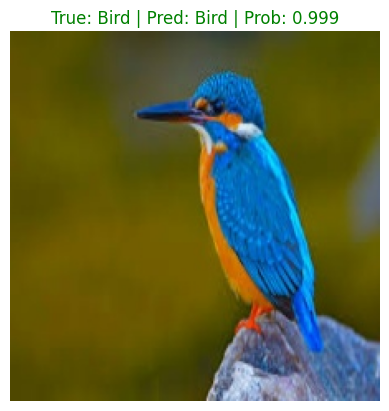

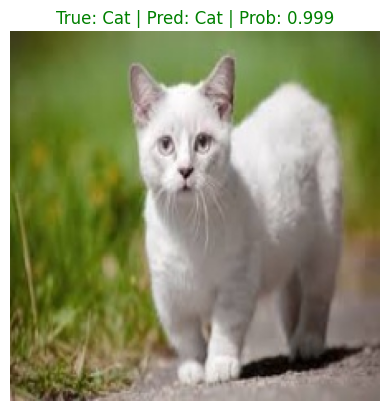

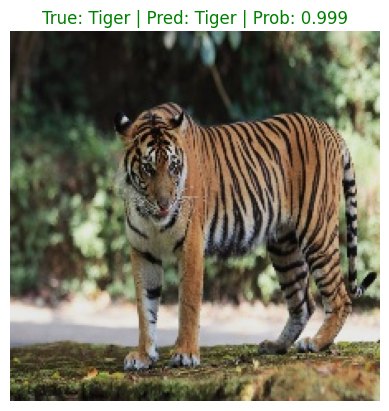

In [ ]:
import random
np.random.seed(42)
no_img_pred = 3
test_img_sample = random.sample(val_data.imgs, k=no_img_pred)

for image_path in test_img_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path[0],
                        class_names=class_names,
                        transform=transform,
                        image_size=(224, 224))

# NEXT

Next we will deploy the trained model on streamlit.